### Gradient descent - iteratively finding optimal parameters for a curve

An optimization algorithm used to minimize a *cost* or *loss* function by iteratively adjusting its parameters.

### Gradient descent for linear function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sample data
X = np.array(
    [5, 12, 18, 25, 33, 40, 48, 55, 63, 70, 78, 85, 93, 100, 108, 115, 123, 130, 138, 145])
y = np.array(
    [3.5, 4.8, 7.2, 9.0, 11.5, 13.2, 12.8, 16.5, 18.1, 17.4, 21.0, 19.8, 25.2, 22.5, 27.4, 26.9, 31.5, 30.2, 35.8, 34.0])

### Step 1: Random initialization of parameters

Randomly initialize $m$ and $c$ with some values.

In [3]:
# Initialize parameters

np.random.seed(42)

m = np.random.randn() 
c = np.random.randn()

learning_rate = 0.00001
epoches = 100

### Step 2: Computing the gradient

Calculate the gradient of cost function w.r.t $m$ and $c$ -

$$ \frac{\partial J}{\partial m} = -\frac{2}{n} \sum x_i (y_i - (m x_i + c))
$$

and 

$$ \frac{\partial J}{\partial c} = -\frac{2}{n} \sum (y_i - (m x_i + c))
$$

### Step 3: Update the parameters

Iteratively using the formula - 

$$ m = m - \alpha\,\frac{\partial J}{\partial m}
$$

$$ c = c - \alpha\,\frac{\partial J}{\partial c}
$$

In [4]:
n = len(X)

for _ in range(epoches):
    y_pred = m * X + c
    error = y_pred - y
    
    # Compute gradients
    a_gradient = (2/n) * np.sum(X * error)
    b_gradient = (2/n) * np.sum(error)
    
    # Update parameters
    m -= learning_rate * a_gradient
    c -= learning_rate * b_gradient

a_opt = m 
b_opt = c

print(f"Fitted parameters: a = {a_opt:.4f}, b = {b_opt:.4f}")

Fitted parameters: a = 0.2522, b = -0.1391


In [5]:
# Generate fitted values
y_fit = a_opt * X + b_opt

# Calculate RMSE loss
rmse = np.sqrt(np.mean((y - y_fit) ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 2.1537


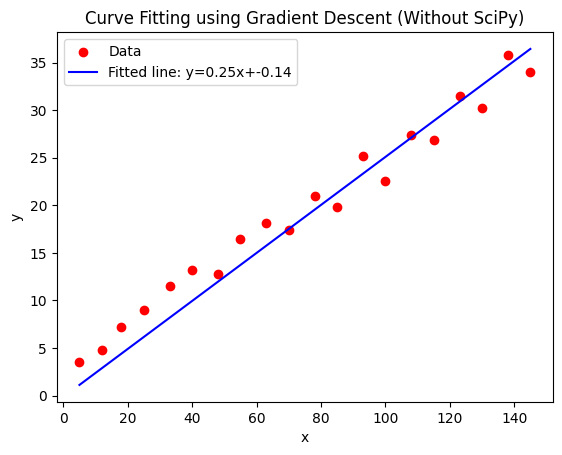

In [6]:
# Plot the data and the fitted curve
plt.scatter(X, y, label="Data", color="red")
plt.plot(X, y_fit, label=f"Fitted line: y={a_opt:.2f}x+{b_opt:.2f}", color="blue")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Curve Fitting using Gradient Descent (Without SciPy)")
plt.show()

#### An example of fitting a complex curve using gradient descent (optional, will think about this)

Fitted parameters: [-1.79943922  1.31863611  0.65455509 -0.09770825]
Root Mean Squared Error (RMSE): 1.1985


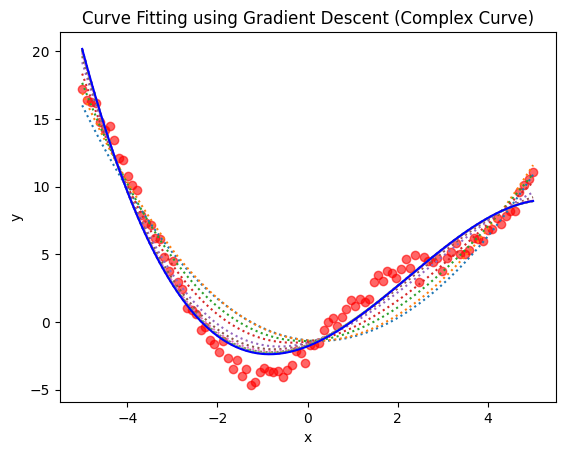

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate complex curve data
np.random.seed(42)
X = np.linspace(-5, 5, 100)
y = 3 * np.sin(X) + 0.5 * X**2 - 2 * np.cos(0.5 * X) + np.random.normal(0, 0.5, size=X.shape)

# Initialize parameters for polynomial regression (degree 3)
w = np.random.randn(4)  # 4 parameters for cubic fit
learning_rate = 0.00025
epochs = 10000
n = len(X)

# Feature matrix (Polynomial basis: [1, X, X^2, X^3])
X_poly = np.vstack([np.ones(n), X, X**2, X**3]).T

# Store intermediate fits for visualization
epoch_checkpoints = [0, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
y_fits = {}

# Gradient Descent
for epoch in range(epochs):
    y_pred = X_poly @ w
    error = y_pred - y
    
    # Compute gradients
    gradients = (2/n) * X_poly.T @ error
    
    # Update parameters
    w -= learning_rate * gradients
    
    # Store intermediate results
    if (epoch + 1) in epoch_checkpoints:
        y_fits[epoch + 1] = X_poly @ w

print(f"Fitted parameters: {w}")

# Generate final fitted values
y_fit = X_poly @ w

# Calculate RMSE loss
rmse = np.sqrt(np.mean((y - y_fit) ** 2))
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot the data and the fitted curves
plt.scatter(X, y, label="Data", color="red", alpha=0.6)
for epoch, y_fit_epoch in y_fits.items():
    plt.plot(X, y_fit_epoch, linestyle="dotted", label=f"Epoch {epoch}")
plt.plot(X, y_fit, label="Final Fit", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Curve Fitting using Gradient Descent (Complex Curve)")
plt.show()